# Hands-on Exercise CLASS Module

In [3]:
pip install plot_confusion_matrix -- user 

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement plot_confusion_matrix (from versions: )
No matching distribution found for plot_confusion_matrix


In [2]:
import numpy as np
import pandas as pd

#Plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Ensemble Methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [3]:

#Mlxtend for visualizing classification decision boundaries
from mlxtend.plotting import plot_decision_regions

In [4]:
# Generating Data1

np.random.seed(100)

a = np.random.multivariate_normal([2,2],[[0.5,0], [0,0.5]], 200)
b = np.random.multivariate_normal([4,4],[[0.5,0], [0,0.5]], 200)

Data1_X = np.vstack((a,b))
Data1_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data2

np.random.seed(100)

a1 = np.random.multivariate_normal([2,2],[[0.25,0], [0,0.25]],200)
a2 = np.random.multivariate_normal([2,4],[[0.25,0], [0,0.25]],200)
a3 = np.random.multivariate_normal([4,2],[[0.25,0], [0,0.25]],200)
a4 = np.random.multivariate_normal([4,4],[[0.25,0], [0,0.25]],200)

Data2_X = np.vstack((a1,a4,a2,a3))
Data2_Y = np.hstack((np.ones(400).T,np.zeros(400).T)).astype(int)


# Generating Data3

np.random.seed(100)

a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])

Data3_X = np.vstack((a1,a2))
Data3_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)


# Generating Data4

np.random.seed(100)

Data4_X = np.random.uniform(0,12,[500,2])
Data4_Y = np.ones([500]).astype(int)
Data4_Y[np.multiply(Data4_X[:,0],Data4_X[:,0]) + np.multiply(Data4_X[:,1],Data4_X[:,1]) - 100 < 0 ] = 0

### 1. Decision Tree

Use __Data3__ to answer the following questions.

<span style="color:red">**Question 1a:** </span> Compute and print the 10-fold cross-validation accuracy using decision tree classifiers with max_depth = 2,4,6,8,10, and 50. 

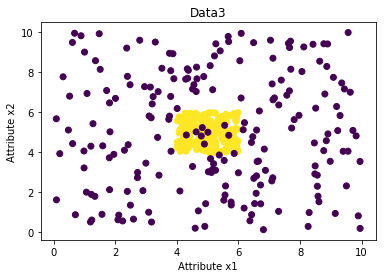

In [5]:
import matplotlib.pyplot as plt
plt.scatter(Data3_X[:,0],Data3_X[:,1], c=Data3_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data3')
plt.show()


In [6]:
dt2 = DecisionTreeClassifier(max_depth=2)
dt4 = DecisionTreeClassifier(max_depth=4)
dt6 = DecisionTreeClassifier(max_depth=6)
dt8 = DecisionTreeClassifier(max_depth=8)
dt10 = DecisionTreeClassifier(max_depth=10)
dt50 = DecisionTreeClassifier(max_depth=50)

In [7]:
dt2_score = cross_val_score(dt2, Data3_X, Data3_Y, cv=10, scoring='accuracy')
dt4_score = cross_val_score(dt4, Data3_X, Data3_Y, cv=10, scoring='accuracy')
dt6_score = cross_val_score(dt6, Data3_X, Data3_Y, cv=10, scoring='accuracy')
dt8_score = cross_val_score(dt8, Data3_X, Data3_Y, cv=10, scoring='accuracy')
dt10_score = cross_val_score(dt10, Data3_X, Data3_Y, cv=10, scoring='accuracy')
dt50_score = cross_val_score(dt50, Data3_X, Data3_Y, cv=10, scoring='accuracy')

In [8]:
dt_accuracy = { 'Depth': [2,4,6,8,10,50],
    'Score': [dt2_score.mean(),dt4_score.mean(),dt6_score.mean(),dt8_score.mean(), dt10_score.mean(),
                          dt50_score.mean()]
                   }
dt_accuracy_df = pd.DataFrame.from_dict(dt_accuracy)
print(dt_accuracy_df)

   Depth   Score
0      2  0.8750
1      4  0.9700
2      6  0.9675
3      8  0.9500
4     10  0.9425
5     50  0.9450


<span style="color:red">**Question 1b:** </span> For what values of max_depth did you observe the lowest accuracy? What is this phenomenon called?

In [9]:

print(dt_accuracy_df.loc[dt_accuracy_df.Score.idxmin()])

Depth    2.000
Score    0.875
Name: 0, dtype: float64


<span style="color:green">**Answer:** For max depth = 2. The accuracy was the lowest. This phenomenon is called underfitting </span>  

<span style="color:red">**Question 1c:** </span> What accuracy did you observe for max depth=50? What is the difference between this accuracy and the highest accuracy? What is this phenomenon called?

In [10]:
dt_accuracy_df.loc[dt_accuracy_df['Depth'] == 50.000]['Score']

5    0.945
Name: Score, dtype: float64

In [11]:
 dt_accuracy_df.loc[dt_accuracy_df.Score.idxmax()]

Depth    4.00
Score    0.97
Name: 1, dtype: float64

In [12]:
dt_accuracy_df.loc[dt_accuracy_df.Score.idxmax()]['Score'] - dt_accuracy_df.loc[dt_accuracy_df['Depth'] == 50.000]['Score']

5    0.025
Name: Score, dtype: float64

<span style="color:green">**Answer: ** Accuracy for Max depth 50 is 94.5% whereas the highest accuracy is 97% for maxdepth = 4. The decrease in accuracy is due to overfitting</span> 

<span style="color:red">**Question 1d:** </span> Plot decision regions for the above decision tree models

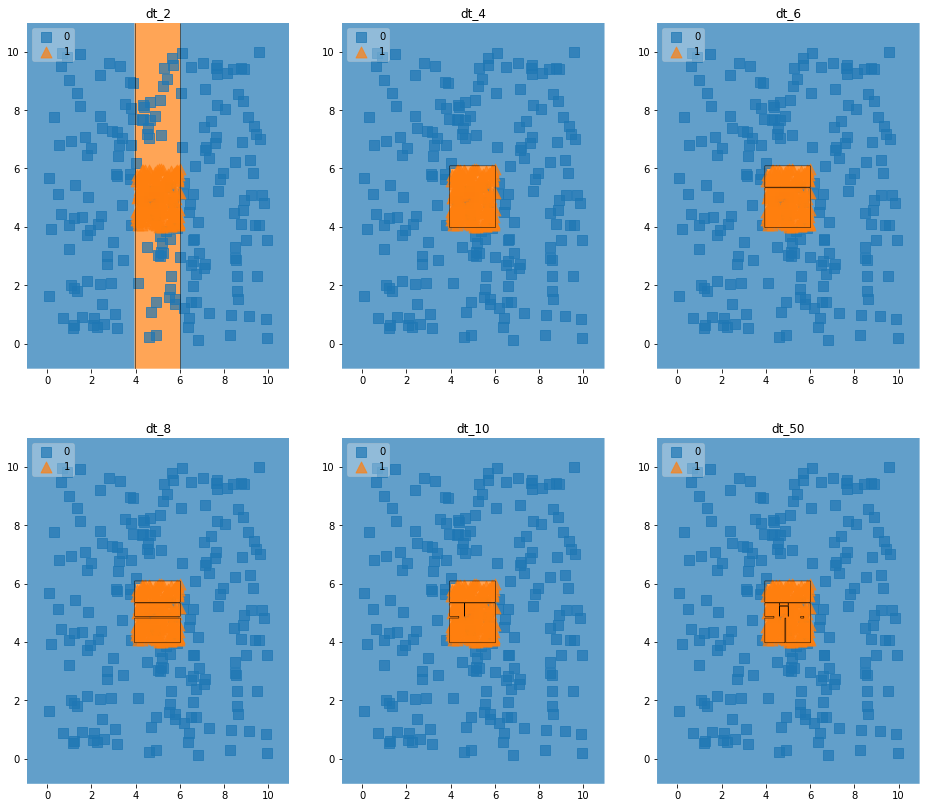

In [13]:
# parameters to set size or markers, contours, and transparency
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.7}
scatter_highlight_kwargs = {'s': 120, 'label': 'Test data', 'alpha': 0.7}


# Creating a list of classifiers and their names for plotting
clf_list = [dt2,dt4,dt6,dt8,dt10,dt50]
labels = ['dt_2','dt_4','dt_6','dt_8','dt_10','dt_50']

# Plotting the decision boundaries
fig = plt.figure(figsize=(16,14))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,3,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 1e:** </span> Based on the decision regions, which depth is better suited for this data? Explain your reason.

<span style="color:green">**Answer:** Maxdepth 4 is the better suited for the data based on decision regions, this would only misclassify 0's in the center
    <ul>
        <li>Depth2: Too many 0's wrongly classified as 1's. This is an underfitting model</li>
        <li>Depth6: Creates 2 region in the center which wrongly classifies some of the 1's as 0's due to the presence of 0's in the central region, thus increasing the misclassification</li>
        <li>Depth8: Creates 3 new region in the center which wrongly classifies some of the 1's as 0's due to the presence of 0's in the central region, thus increasing the misclassification</li>
        <li>Depth10: Creates 5 regions in the center which wrongly classifies some of the 1's as 0's due to the presence of 0's in the central region, thus increasing the misclassification</li>
        <li>Depth50: Creates 7 regions in the center to account for the presence of 0's in the central region, thus increasing the misclassification. This is an example of overfitting model</li>
    </ul>
  </span> 

### 2. k Nearest Neighbor

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 2a:** </span>
 Compute and print the 10-fold cross-validation accuracy for a kNN classifier with n_neighbors = 1, 5, 10, 50

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn50 = KNeighborsClassifier(n_neighbors=50)

In [15]:
knn1_score = cross_val_score(knn1, Data2_X, Data2_Y, cv=10, scoring='accuracy')
knn5_score = cross_val_score(knn5, Data2_X, Data2_Y, cv=10, scoring='accuracy')
knn10_score = cross_val_score(knn10, Data2_X, Data2_Y, cv=10, scoring='accuracy')
knn50_score = cross_val_score(knn50, Data2_X, Data2_Y, cv=10, scoring='accuracy')

In [16]:
knn_accuracy_df = pd.DataFrame.from_dict({ 'Neighbours': [1,5,10,50],
    'Score': [knn1_score.mean(),knn5_score.mean(),knn10_score.mean(),knn50_score.mean()]})
print(knn_accuracy_df)

   Neighbours    Score
0           1  0.91250
1           5  0.93500
2          10  0.94000
3          50  0.94125


<span style="color:red">**Question 2b:** </span> For what values of n_neighbors did you observe the lowest accuracy? What is this phenomenon called?

In [17]:
print(knn_accuracy_df.loc[knn_accuracy_df.Score.idxmin()])

Neighbours    1.0000
Score         0.9125
Name: 0, dtype: float64


<span style="color:green">**Answer: Neighbour 1 has the lowest accuracy. This phenomenon is called overfitting** </span>  

<span style="color:red">**Question 2c:** </span>  Plot decision regions for a kNN classifier with n_neighbors = 1, 5, 10, 50

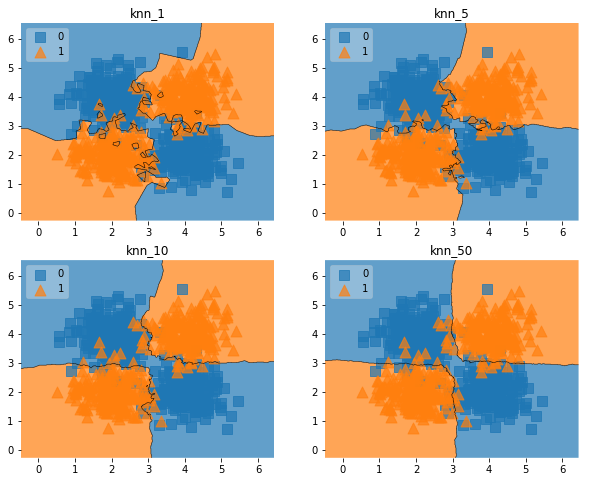

In [18]:
# Creating a list of classifiers and their names for plotting
clf_list = [knn1,knn5,knn10,knn50]
labels = ['knn_1','knn_5','knn_10','knn_50']

# Plotting the decision boundaries
fig = plt.figure(figsize=(10,8))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 2d:** </span>  From the plots for __Question 2c__ what do you notice about the nature of decision boundary as the n_neighbors are increasing.

<span style="color:green">**Answer:** As neighbours are increasing the decision region is becoming more and more generalized.</span>   

### 3. Naive Bayes

<span style="color:red">**Question 3a:** </span> Compute and print the 10-fold cross-validation accuracy for a NB classifier on all four datasets: Data1, Data2, Data3, Data4

In [19]:
nb = GaussianNB()

In [20]:
nb_scores_1 = cross_val_score(nb, Data1_X, Data1_Y, cv=10, scoring='accuracy')
nb_scores_2 = cross_val_score(nb, Data2_X, Data2_Y, cv=10, scoring='accuracy')
nb_scores_3 = cross_val_score(nb, Data3_X, Data3_Y, cv=10, scoring='accuracy')
nb_scores_4 = cross_val_score(nb, Data4_X, Data4_Y, cv=10, scoring='accuracy')

In [21]:
nb_accuracy_df = pd.DataFrame.from_dict({ 'Dataset': [1,2,3,4],
    'Score': [nb_scores_1.mean(),nb_scores_2.mean(),nb_scores_3.mean(),nb_scores_4.mean()]})
print(nb_accuracy_df)

   Dataset     Score
0        1  0.967500
1        2  0.050000
2        3  0.960000
3        4  0.964074


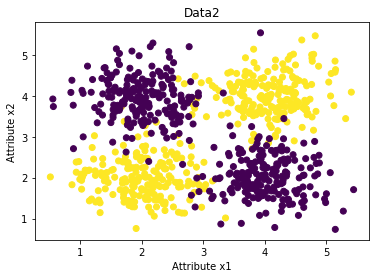

In [22]:
plt.scatter(Data2_X[:,0],Data2_X[:,1], c= Data2_Y)
plt.xlabel('Attribute x1')
plt.ylabel('Attribute x2')
plt.title('Data2')
plt.show()

<span style="color:red">**Question 3b:** </span> State your observations on the datasets the NB algorithm performed poorly.

<span style="color:green">**Answer:** As we know naive bayes forms a probability area based on the test points, in the above case there'll overlapping area for the two classes, hence the low accuracy. Naive Bayes works well when we have the least overlapping region</span>  

<span style="color:red">**Question 3c:** </span> Plot decision regions for a NB classifier on each of the four datasets

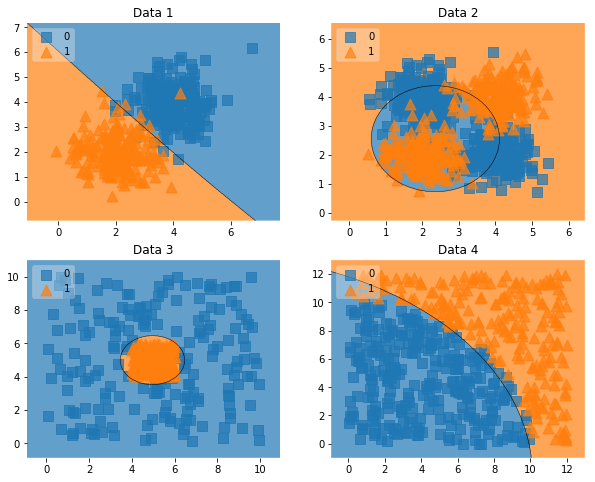

In [23]:
# Creating a list of classifiers and their names for plotting
data_list = [Data1_X,Data2_X,Data3_X,Data4_X]
label_list = [Data1_Y,Data2_Y,Data3_Y, Data4_Y]
labels = ['Data 1','Data 2','Data 3','Data 4']
# Plotting the decision boundaries
fig = plt.figure(figsize=(10,8))
count = 0;

for X, y, label in zip(data_list,label_list, labels):
    count = count + 1;
    nb.fit(X, y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=X, y=y, clf=nb, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 3d:** </span> Describe the shape of the decision boundary on all four datasets. Explain the reason.

<span style="color:green">**Answer: <list><ol> <li>Linear </li> <li>Ellipsoidal </li> <li>Ellipsoidal </li> <li>curve </li> </ol> </list>** </span>  

<span style="color:red">**Question 3e:** </span> Based on your plots in __Question 3c__ explain the poor performance of NB on some datasets.

<span style="color:green">**Answer: NB performs well when the data from different classes are well seperated, if there is some overlap between the classes, the performance of NB classifier suffers** </span>  

### 4. Support Vector Machines (Linear)

<span style="color:red">**Question 4a:** </span>  Based on the visualization of the four datasets, assess how well a linear SVM is expected to perform. Specifically, rank the datasets in the order of decreasing accuracy when a linear SVM is used. No need to compute accuracy to answer this question.

<span style="color:green">**Answer:** 1. D1, 2. D4, 3. D3, 4.D2</span>


<span style="color:red">**Question 4b:** </span>  Compute and print the 10-fold cross-validation accuracy for a linear SVM classifier on all four datasets: Data1, Data2, Data3, Data4

In [24]:
svm_linear = SVC(C=0.5, kernel='linear')

In [25]:
svm_scores_1 = cross_val_score(svm_linear, Data1_X, Data1_Y, cv=10, scoring='accuracy')
svm_scores_2 = cross_val_score(svm_linear, Data2_X, Data2_Y, cv=10, scoring='accuracy')
svm_scores_3 = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=10, scoring='accuracy')
svm_scores_4 = cross_val_score(svm_linear, Data4_X, Data4_Y, cv=10, scoring='accuracy')

In [26]:
svm_accuracy_df = pd.DataFrame.from_dict({ 'Dataset': [1,2,3,4],
    'Score': [svm_scores_1.mean(),svm_scores_2.mean(),svm_scores_3.mean(),svm_scores_4.mean()]})
print(svm_accuracy_df)

   Dataset     Score
0        1  0.967500
1        2  0.141250
2        3  0.642500
3        4  0.925946


<span style="color:red">**Question 4c:** </span> Rank the datasets in the decreasing order of accuracy of SVM.

<span style="color:green">**Answer:** 1. D1, 2. D4, 3. D3, 4.D2</span>


<span style="color:red">**Question 4d:** </span>  Plot decision regions for a linear SVM classifier on each of the four datasets

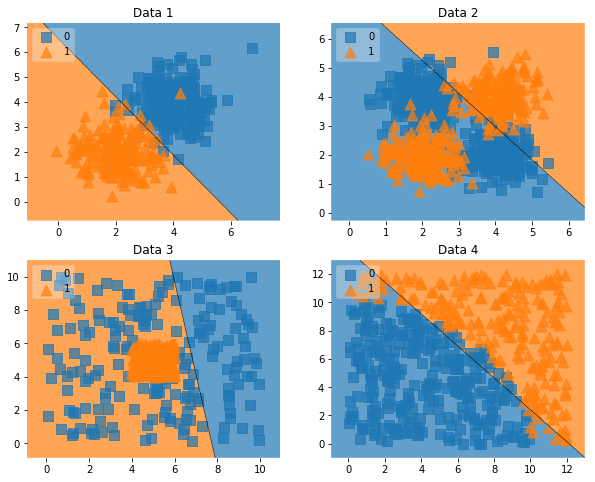

In [27]:
# Creating a list of classifiers and their names for plotting
data_list = [Data1_X,Data2_X,Data3_X,Data4_X]
label_list = [Data1_Y,Data2_Y,Data3_Y, Data4_Y]
labels = ['Data 1','Data 2','Data 3','Data 4']
# Plotting the decision boundaries
fig = plt.figure(figsize=(10,8))
count = 0;

for X, y, label in zip(data_list,label_list, labels):
    count = count + 1;
    svm_linear.fit(X, y)
    ax = plt.subplot(2,2,count)
    fig = plot_decision_regions(X=X, y=y, clf=svm_linear, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 4e:** </span>Explain the reason for your observations in __Question 4c__ using observations from the above decision regions.

<span style="color:green">**Answer: As we can see from the above plots, svm is able to do a clearer seperation on D1 compared to D2, where SVM fairs better than D4, for which svm although looks to have failed miserbaly is still better than SVM Linear classification on D3** </span>


### 5. Non-linear Support Vector Machines

Use __Data2__ to answer the following questions.

<span style="color:red">**Question 5a:** </span>
Compute and print the 10-fold cross-validation accuracy for an SVM with a polynomial kernel and degree values 1, 2, and 3.

In [28]:
svm_poly = SVC(C=0.5, kernel='poly',degree=1, gamma = 'auto')
svm_poly_2 = SVC(C=0.5, kernel='poly',degree=2, gamma = 'auto')
svm_poly_3 = SVC(C=0.5, kernel='poly',degree=3, gamma = 'auto')

In [29]:
svm_poly_scores = cross_val_score(svm_poly, Data2_X, Data2_Y, cv=10, scoring='accuracy')
svm_poly_scores_2 = cross_val_score(svm_poly_2, Data2_X, Data2_Y, cv=10, scoring='accuracy')
svm_poly_scores_3 = cross_val_score(svm_poly_3, Data2_X, Data2_Y, cv=10, scoring='accuracy')

<span style="color:red">**Question 5b:** </span> Rank the polynomial kernels in decreasing order of accuracy.

In [30]:
svm_poly_accuracy_df = pd.DataFrame.from_dict({ 'Order': [1,2,3],
    'Score': [svm_poly_scores.mean(),svm_poly_scores_2.mean(),svm_poly_scores_3.mean()]})
print(svm_poly_accuracy_df)

   Order    Score
0      1  0.13375
1      2  0.86500
2      3  0.87625


<span style="color:green">**Answer: Degree 3, Degree 2 and Degree 1** </span>


<span style="color:red">**Question 5c:** </span>  Plot decision regions for a polynomial kernel SVM with degree values 1, 2, and 3.

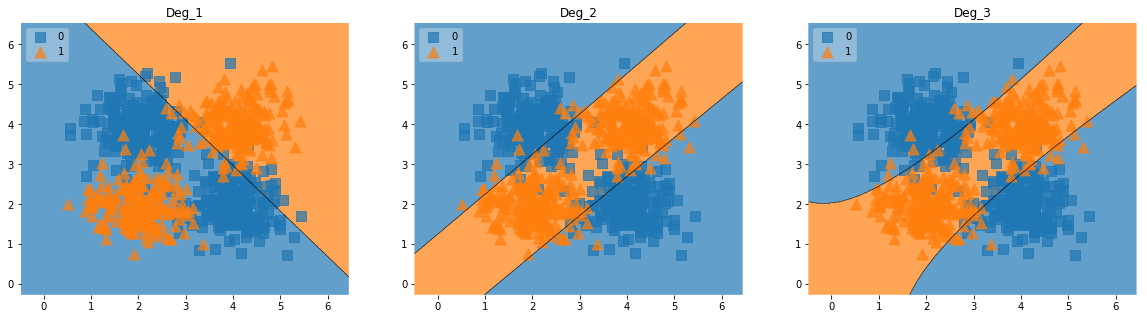

In [31]:
# Creating a list of classifiers and their names for plotting
clf_list = [svm_poly,svm_poly_2,svm_poly_3]
labels = ['Deg_1','Deg_2','Deg_3']

# Plotting the decision boundaries
fig = plt.figure(figsize=(20,5))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(1,3,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5d:** </span> Based on the decision regions, explain the reason for your observations in __Question 5c__.

<span style="color:green">**Answer: SVM with degree 1 is a linear separator trying to separate linearly unseparable data hence it fails miserably. SVM with degree 2 perfoms better as it uses 2 linear separators to chart out a region for class 1. SVM with degree 3 performs even better because it uses curves to further refine the decision region** </span>



<span style="color:red">**Question 5e:** </span>  Compute the 10-fold cross-validation accuracy for an SVM with an RBF kernel and gamma values 0.01, 0.1, and 1.

In [32]:
svm_rbf_001 = SVC(C = 0.5, kernel='rbf', gamma=0.01) 
svm_rbf_01 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf_1 = SVC(C = 0.5, kernel='rbf', gamma=1) 

In [33]:
svm_rbf_scores_001 = cross_val_score(svm_rbf_001, Data2_X, Data2_Y, cv=10, scoring='accuracy')
svm_rbf_scores_01 = cross_val_score(svm_rbf_01, Data2_X, Data2_Y, cv=10, scoring='accuracy')
svm_rbf_scores_1 = cross_val_score(svm_rbf_1, Data2_X, Data2_Y, cv=10, scoring='accuracy')

In [34]:
svm_rbf_accuracy_df = pd.DataFrame.from_dict({ 'Order': ['001','01','1'],
    'Score': [svm_rbf_scores_001.mean(),svm_rbf_scores_01.mean(),svm_rbf_scores_1.mean()]})
print(svm_rbf_accuracy_df)

  Order    Score
0   001  0.30125
1    01  0.93625
2     1  0.94000


<span style="color:red">**Question 5f:** </span> Rank the RBF kernels in decreasing order of accuracy.

<span style="color:green">**Answer:  1. svm_rbf_scores_1, 2. svm_rbf_scores_01, 3.svm_rbf_scores_001** </span>


<span style="color:red">**Question 5g:** </span>  Plot decision regions for the above RBF Kernels

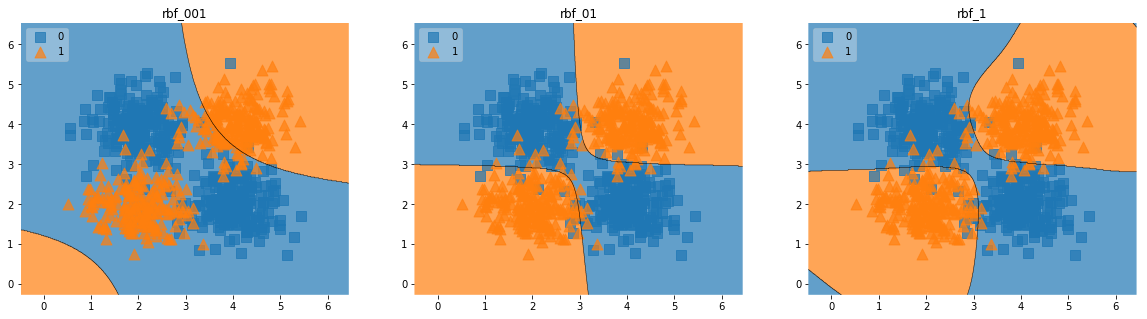

In [35]:
# Creating a list of classifiers and their names for plotting
clf_list = [svm_rbf_001,svm_rbf_01,svm_rbf_1]
labels = ['rbf_001','rbf_01','rbf_1']

# Plotting the decision boundaries
fig = plt.figure(figsize=(20,5))
count = 0;

for clf, label in zip(clf_list, labels):
    count = count + 1;
    clf.fit(Data2_X, Data2_Y)
    ax = plt.subplot(1,3,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=clf, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)

    plt.title(label)
plt.show()

<span style="color:red">**Question 5h:** </span>  Explain the reason for your observations in __Question 5f__ from the above decision regions.

<span style="color:green">**Answer: 1. svm_rbf_.001 performs very badly because we tell the kernel that the variance between the points is very high and hence the rbf tries to account for it. 2. svm_rbf_.01 performs very well better because the variance set for the kernel appropriates the variance in the data 3. svm_rbf_1 also performs very well, infact marginally better than svm_rbf_1 because the decrease in variance fits the data better** </span>




<span style="color:red">**Question 5i:** </span>  Between SVM with a Polynomial kernel and SVM with an RBF kernel, which one is ideally suited of Data3? Explain your reason.

<span style="color:green">**Answer:** </span>




### 6. Classification Evaluation

<span style="color:red">**Question 6a:** </span>

Run SVM classifier (with RBF kernel and gamma=0.1) on __Data2__ and compute the mean of k-fold cross-validation accuracies for cv = 3, 4, 5 and 6. Report the mean of accuracies for each choice of 'cv' and explain the reason for any differences in the mean accuracy you observe.

In [36]:
svm_rbf_scores_01_cv_3 = cross_val_score(svm_rbf_01, Data2_X, Data2_Y, cv=3, scoring='accuracy')
svm_rbf_scores_01_cv_4 = cross_val_score(svm_rbf_01, Data2_X, Data2_Y, cv=4, scoring='accuracy')
svm_rbf_scores_01_cv_5 = cross_val_score(svm_rbf_01, Data2_X, Data2_Y, cv=5, scoring='accuracy')
svm_rbf_scores_01_cv_6 = cross_val_score(svm_rbf_01, Data2_X, Data2_Y, cv=6, scoring='accuracy')

In [37]:
svm_rbf_accuracy_cv_df = pd.DataFrame.from_dict({ 'Order': ['cv_3','cv_4','cv_5', 'cv_6'],
    'Score': [svm_rbf_scores_01_cv_3.mean(),svm_rbf_scores_01_cv_4.mean(),svm_rbf_scores_01_cv_5.mean()
              ,svm_rbf_scores_01_cv_6.mean()]})
print(svm_rbf_accuracy_cv_df)

  Order     Score
0  cv_3  0.903827
1  cv_4  0.916250
2  cv_5  0.927500
3  cv_6  0.932553


<span style="color:green">**Answer: This may be due to the increase in training data points the more the data points used to trained the model, the better the model accuracy** </span> 

<span style="color:red">**Question 6b:** </span>

For DT, NB, kNN, Linear SVM, Polynomial Kernel SVM, and SVM with RBF kernel classifiers, compute the 30-fold crossvalidation __accuracies__ and __precision__ (use scoring='precision' when calling cross_val_score()) on __Data3__. Rank the classifiers based on accuracy and precision scores. Are the best classifiers ranked according to accuracy and precision the same? If not, explain the reason. 

For the classifiers, feel free to choose any parameter settings you prefer.

In [38]:
dt4_accuracy_score = cross_val_score(dt4, Data3_X, Data3_Y, cv=30, scoring='accuracy')
nb_accuracy_score = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='accuracy')
knn5_accuracy_score = cross_val_score(knn5, Data3_X, Data3_Y, cv=30, scoring='accuracy')
svm_linear_accuracy_score = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='accuracy')
svm_poly_accuracy_score = cross_val_score(svm_poly_3, Data3_X, Data3_Y, cv=30, scoring='accuracy')
svm_rbf_accuracy_score = cross_val_score(svm_rbf_1, Data3_X, Data3_Y, cv=30, scoring='accuracy')

In [39]:
dt4_precision_score = cross_val_score(dt4, Data3_X, Data3_Y, cv=30, scoring='precision')
nb_precision_score = cross_val_score(nb, Data3_X, Data3_Y, cv=30, scoring='precision')
knn5_precision_score = cross_val_score(knn5, Data3_X, Data3_Y, cv=30, scoring='precision')
svm_linear_precision_score = cross_val_score(svm_linear, Data3_X, Data3_Y, cv=30, scoring='precision')
svm_poly_precision_score = cross_val_score(svm_poly_3, Data3_X, Data3_Y, cv=30, scoring='precision')
svm_rbf_precision_score = cross_val_score(svm_rbf_1, Data3_X, Data3_Y, cv=30, scoring='precision')

In [40]:
classifier_rank_accuracy_df = pd.DataFrame.from_dict({ 'Order': ['dt','nb','knn', 'svm_linear', 'svm_poly', 'svm_rbf'],
    'Score': [dt4_accuracy_score.mean(),nb_accuracy_score.mean(),knn5_accuracy_score.mean()
              ,svm_linear_accuracy_score.mean(),svm_poly_accuracy_score.mean(),svm_rbf_accuracy_score.mean()]})
print(classifier_rank_accuracy_df)

        Order     Score
0          dt  0.971825
1          nb  0.959127
2         knn  0.949206
3  svm_linear  0.642857
4    svm_poly  0.855556
5     svm_rbf  0.954365


In [41]:
classifier_rank_precision_df = pd.DataFrame.from_dict({ 'Order': ['dt','nb','knn', 'svm_linear', 'svm_poly', 'svm_rbf'],
    'Score': [knn5_precision_score.mean(),nb_precision_score.mean(),knn5_precision_score.mean()
              ,svm_linear_precision_score.mean(),svm_poly_precision_score.mean(),svm_rbf_precision_score.mean()]})
print(classifier_rank_accuracy_df)

        Order     Score
0          dt  0.971825
1          nb  0.959127
2         knn  0.949206
3  svm_linear  0.642857
4    svm_poly  0.855556
5     svm_rbf  0.954365


<span style="color:green">**Answer: Yes in both cases decision tree with max depth = 4 is the best classifier** </span> 



### 7. Ensemble Methods

<span style="color:red">**Question 7a:** </span>
 __Bagging:__ Create bagging classifiers each with n_estimators = 1,2,3,4,5,10, and 20. Use a **linear SVM** (with C=0.5) as a base classifier. Using __Data3__, compute the mean __5-fold__ cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how bagging affected the mean and standard deviation of the base classifier. Explain your reason for what may have lead to these observations.

In [42]:
n_est_list = [1,2,3,4,5,10,20]
for n_est in n_est_list:
    # create an instance of bagging classifier with 'n_est' estimators
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(bagging, Data3_X, Data3_Y, cv=5, scoring='accuracy')
    print("Bagging Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Bagging Accuracy: 0.58 (+/- 0.07) #estimators: 1
Bagging Accuracy: 0.57 (+/- 0.08) #estimators: 2
Bagging Accuracy: 0.64 (+/- 0.04) #estimators: 3
Bagging Accuracy: 0.59 (+/- 0.08) #estimators: 4
Bagging Accuracy: 0.62 (+/- 0.04) #estimators: 5
Bagging Accuracy: 0.75 (+/- 0.11) #estimators: 10
Bagging Accuracy: 0.68 (+/- 0.07) #estimators: 20


<span style="color:green">**Answer:** </span> 



<span style="color:red">**Question 7b:** </span>
 Plot decision regions for the above bagging classifiers. 

C:\Users\nifaullah\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


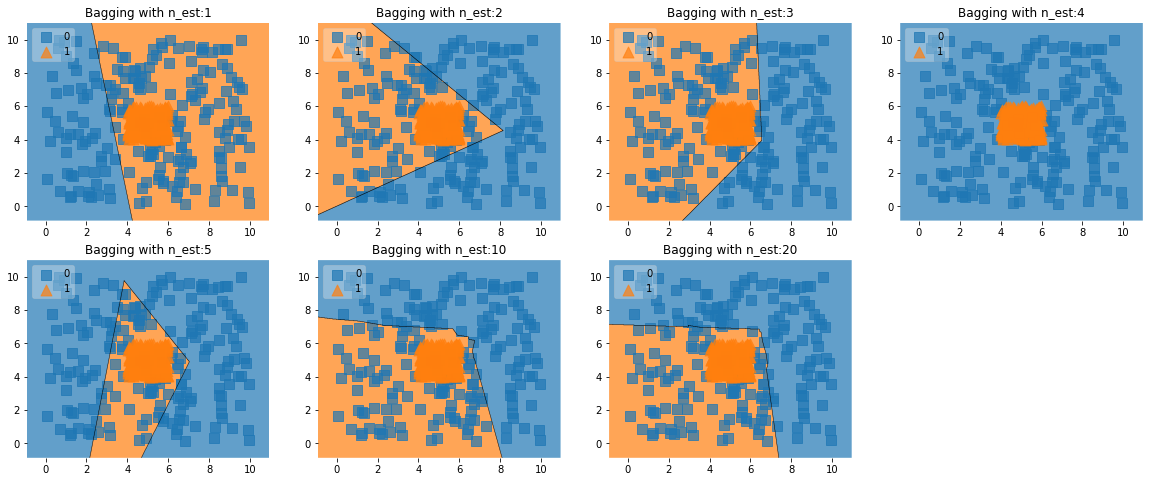

In [ ]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    bagging = BaggingClassifier(base_estimator=svm_linear, n_estimators=n_est)
    bagging.fit(Data3_X, Data3_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data3_X, y=Data3_Y, clf=bagging, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Bagging with n_est:'+str(n_est))
    
plt.show()

<span style="color:red">**Question 7c:** </span>
 Comment on the quality of the decision regions for a bagging classifiers with many estimators when compared to that of only one estimator. 

<span style="color:green">**Answer:The quality of the decision region with many estimators (say 10 or 20) when compared with **  the qualtiy of decision region</span> 



<span style="color:red">**Question 7d:** </span>
 **Boosting:**  Create boosting classifiers each with n_estimators = 1,2,3,4,5,10, 20, and 40. Use a **Decision Tree** (with max_depth=2) as a base classifier. Using __Data2__, compute the mean **10-fold** cross validation accuracies and standard deviation for each of the bagging classifiers. State your observations on how boosting affected the mean and standard deviation of the base classifier. 

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
n_est_list = [1,2,3,4,5,10,20,40]
for n_est in n_est_list:
    # create an instance of a boosting classifier with 'n_est' estimators
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    # compute cross-validation accuracy for each bagging classifier
    scores = cross_val_score(boosting, Data2_X, Data2_Y, cv=10, scoring='accuracy')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.88 (+/- 0.03) #estimators: 2
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 3
Boosting Accuracy: 0.90 (+/- 0.04) #estimators: 4
Boosting Accuracy: 0.92 (+/- 0.03) #estimators: 5
Boosting Accuracy: 0.92 (+/- 0.04) #estimators: 10
Boosting Accuracy: 0.91 (+/- 0.04) #estimators: 20
Boosting Accuracy: 0.91 (+/- 0.02) #estimators: 40


<span style="color:green">**Answer:** </span> 



<span style="color:red">**Question 7e:** </span>
 Plot decision regions for above boosting classifiers. Explain your reason for what may have lead to the observations in __Question 7d__.

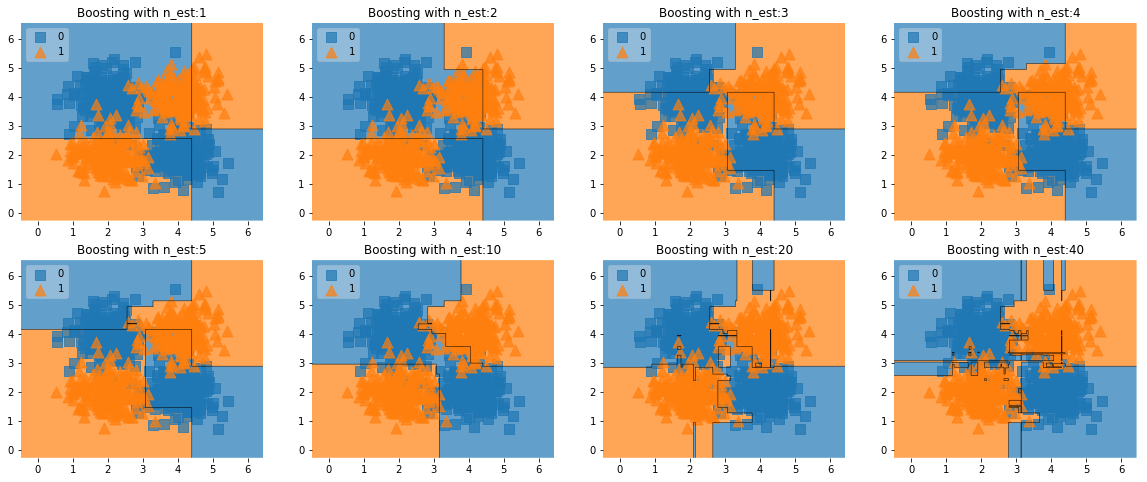

In [ ]:
fig = plt.figure(figsize=(20, 8))
count = 0;
for n_est in n_est_list:
    count = count + 1;
    boosting = AdaBoostClassifier(base_estimator=dt, n_estimators=n_est)
    boosting.fit(Data2_X, Data2_Y)
    ax = plt.subplot(2,4,count)
    fig = plot_decision_regions(X=Data2_X, y=Data2_Y, clf=boosting, legend=2, 
                        scatter_kwargs=scatter_kwargs,
                        contourf_kwargs=contourf_kwargs,
                        scatter_highlight_kwargs=scatter_highlight_kwargs)
    plt.title('Boosting with n_est:'+str(n_est))
    
plt.show()

<span style="color:green">**Answer:** </span> 




### 8. Classification on a real-world dataset

Real world datasets typically have many attributes making it hard to visualize. This question is about using SVM and Decision Tree algorithms on a real world 'breast cancer' dataset.

The following code reads the dataset from the 'datasets' library in sklearn.

In [ ]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [ ]:
X = cancer.data
Y = cancer.target

Number of samples are:

In [ ]:
X.shape

(569, 30)

<span style="color:red">**Question 8a:** </span>
 Of all the SVM classifiers you explored in this hands-on exercise (i.e., linear SVM, SVM with a polynomial kernel and RBF kernel), which SVM results in a highest 10-fold cross-validation accuracy on this dataset? Explore the possible parameters for each SVM to determine the best performance for that SVM. For example, when studying linear SVM, explore a range of C values [0.001, 0.01, 0.1, 1]. Similarly for degree consider [1,2]. For gamma, consider [0.001, 0.01, 0.1, 1, 10, 100].

In [ ]:
#Linear SVM
svm_linear_c_05 = SVC(C=0.5, kernel='linear')
svm_linear_c_10 = SVC(C=10, kernel='linear')

In [ ]:
svm_linear_scores_c_05 = cross_val_score(svm_linear_c_05, X, Y, cv=10, scoring='accuracy')

In [ ]:
svm_linear_scores_c_10 = cross_val_score(svm_linear_c_10, X, Y, cv=10, scoring='accuracy')

In [ ]:
svm_linear_accuracy_cancer = pd.DataFrame.from_dict({ 'C': ['.5','10'],
                                                  'Score': [svm_linear_scores_c_05.mean(),
                                                            svm_linear_scores_c_10.mean()]})
print(svm_linear_accuracy_cancer)

    C     Score
0  .5  0.952532
1  10  0.950839


In [ ]:
#Polynomial varying C and degree
#RBF varying C and gamma
svm_poly_1_c_05 = SVC(C = 0.5, kernel='poly', degree=1, gamma = 'auto')
svm_poly_1_c_10 = SVC(C = 10, kernel='poly', degree=1, gamma = 'auto')
svm_poly_3_c_05 = SVC(C = 0.5, kernel='poly', degree=3, gamma = 'auto')
svm_poly_3_c_10 = SVC(C = 10, kernel='poly', degree=3, gamma = 'auto')
svm_poly_5_c_05 = SVC(C = 0.5, kernel='poly', degree=5, gamma = 'auto')
svm_poly_5_c_10 = SVC(C = 10, kernel='poly', degree=5, gamma = 'auto')

In [ ]:
svm_poly_scores_1_c_05 = cross_val_score(svm_poly_1_c_05, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_1_c_10 = cross_val_score(svm_poly_1_c_10, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_3_c_05 = cross_val_score(svm_poly_3_c_05, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_3_c_10 = cross_val_score(svm_poly_3_c_10, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_5_c_05 = cross_val_score(svm_poly_5_c_05, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_5_c_10 = cross_val_score(svm_poly_5_c_10, X, Y, cv=10, scoring='accuracy')

svm_poly_accuracy_cancer = pd.DataFrame.from_dict({ 'Degree': ['1','1','3','3','5','5'],
                                                  'C': ['.5','10','.5','10','.5','10'],
                                                  'Score': [svm_poly_scores_1_c_05.mean(),
                                                            svm_poly_scores_1_c_10.mean(),
                                                            svm_poly_scores_3_c_05.mean(),
                                                            svm_poly_scores_3_c_10.mean(),
                                                            svm_poly_scores_5_c_05.mean(),
                                                            svm_poly_scores_5_c_10.mean()]})
print(svm_poly_accuracy_cancer)

In [ ]:
svm_poly_scores_1_c_10 = cross_val_score(svm_poly_1_c_10, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_3_c_05 = cross_val_score(svm_poly_3_c_05, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_3_c_10 = cross_val_score(svm_poly_3_c_10, X, Y, cv=10, scoring='accuracy')
svm_poly_scores_5_c_05 = cross_val_score(svm_poly_5_c_05, X, Y, cv=10, scoring='accuracy')

In [ ]:
#RBF varying C and gamma
svm_rbf_001_c_05 = SVC(C = 0.5, kernel='rbf', gamma=0.01)
svm_rbf_001_c_10 = SVC(C = 10, kernel='rbf', gamma=0.01)
svm_rbf_01_c_05 = SVC(C = 0.5, kernel='rbf', gamma=0.1)
svm_rbf_01_c_10 = SVC(C = 10, kernel='rbf', gamma=0.1)
svm_rbf_1_c_05 = SVC(C = 0.5, kernel='rbf', gamma=1)
svm_rbf_1_c_10 = SVC(C = 10, kernel='rbf', gamma=1)


svm_rbf_scores_001_c_05 = cross_val_score(svm_rbf_001_c_05, X, Y, cv=10, scoring='accuracy')
svm_rbf_scores_001_c_10 = cross_val_score(svm_rbf_001_c_10, X, Y, cv=10, scoring='accuracy')
svm_rbf_scores_01_c_05 = cross_val_score(svm_rbf_01_c_05, X, Y, cv=10, scoring='accuracy')
svm_rbf_scores_01_c_10 = cross_val_score(svm_rbf_01_c_10, X, Y, cv=10, scoring='accuracy')
svm_rbf_scores_1_c_05 = cross_val_score(svm_rbf_1_c_05, X, Y, cv=10, scoring='accuracy')
svm_rbf_scores_1_c_10 = cross_val_score(svm_rbf_1_c_10, X, Y, cv=10, scoring='accuracy')

svm_rbf_accuracy_cancer = pd.DataFrame.from_dict({ 'Gamma': ['.01','.01','.1','.1','1','1'],
                                                  'C': ['.5','10','.5','10','.5','10'],
                                                  'Score': [svm_rbf_scores_001_c_05.mean(),
                                                            svm_rbf_scores_001_c_10.mean(),
                                                            svm_rbf_scores_01_c_05.mean(),
                                                            svm_rbf_scores_01_c_10.mean(),
                                                            svm_rbf_scores_1_c_05.mean(),
                                                            svm_rbf_scores_1_c_10.mean()]})
print(svm_rbf_accuracy_cancer)


<span style="color:green">**Answer:** </span> 


<span style="color:red">**Question 8b:** </span>
 Similar to __Question 8a__ explore decision trees with different max_depth to determine which values returns the best classifier.

In [ ]:
dt2_score_cancer = cross_val_score(dt2, X, Y, cv=10, scoring='accuracy')
dt4_score_cancer = cross_val_score(dt4, X, Y, cv=10, scoring='accuracy')
dt6_score_cancer = cross_val_score(dt6, X, Y, cv=10, scoring='accuracy')
dt8_score_cancer = cross_val_score(dt8, X, Y, cv=10, scoring='accuracy')
dt10_score_cancer = cross_val_score(dt10, X, Y, cv=10, scoring='accuracy')
dt50_score_cancer = cross_val_score(dt50, X, Y, cv=10, scoring='accuracy')

dt_accuracy_cancer = { 'Depth': [2,4,6,8,10,50],
    'Score': [dt2_score_cancer.mean(),dt4_score_cancer.mean(),dt6_score_cancer.mean(),dt28_score_cancer.mean(),
              dt10_score_cancer.mean(), dt50_score.mean()]
                   }
dt_accuracy_df_cancer = pd.DataFrame.from_dict(dt_accuracy_cancer)
print(dt_accuracy_df_cancer)

<span style="color:green">**Answer:** </span> 



<span style="color:red">**Question 8c:** </span>
 Imagine a scenario where you are working at a cancer center as a data scientist tasked with identifying the characteristics that distinguish malignant tumors from benign tumors. Based on your knowledge of classification techniques which approach would you use and why?

<span style="color:green">**Answer:** </span> 
